# PROJECT REPORT on Imports and Exports Data Analysis using Pandas & Numpy Libraries


**Project Information**


* **Project Title**: Analysis of Imports and Exports Dataset
* **Student Name**: Aayush Garg, Priyanka Goyal
* **Enrollment Number** : 055001 , 055034
* **Group No** : 28

---


# **Description of Data**

*   **Data Source:** https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000
*   **Data Size:** 1 MB

*   **Data Type:** Panel

*   **Data Dimension:** There are 16 variables and 15,000 observations

*   **Data Variable Type:**

Sr. No. | Data Variable | Type |
| --- | --- | --- |
| 1. | Transaction ID | Text
| 2. | Country | Text
| 3. | Product | Text
| 4. | Import Export | Text
| 5. | Quantity | Number {Integer}
| 6. | Value | Number {Decimal}
| 7. | Date | Number {Integer}
| 8. | Category | Text
| 9. | Port | Text
| 10.| Customs Code | Number {Integer}
| 11.| Weight | Number {Decimal}
| 12.| Shipping Method | Text
| 13.| Supplier | Text
| 14.| Customer | Text
| 15.| Invoice Number | Number {Integer}
| 16.| Payment Terms | Text

*   **Data Variable Category:**

Sr. No. | Data Variable | Category |
| --- | --- | --- |
| 1. | Transaction ID | Index
| 2. | Country | Categorical {Nominal}
| 3. | Product | Categorical {Nominal}
| 4. | Import Export | Categorical {Nominal}
| 5. | Quantity | Non-Categorical
| 6. | Value | Non-Categorical
| 7. | Date | Non-Categorical
| 8. | Category | Categorical {Nominal}
| 9. | Port | Categorical {Nominal}
| 10.| Customs Code | Non-Categorical
| 11.| Weight | Non-Categorical
| 12.| Shipping Method | Categorical {Nominal} 
| 13.| Supplier | Categorical {Nominal} 
| 14.| Customer | Categorical {Nominal} 
| 15.| Invoice Number | Non-Categorical
| 16.| Payment Terms | Categorical {Ordinal} 

---

In [1]:
# Importing Relevant Python Libraries.
import pandas as pd
import numpy as np

In [2]:
# Loading the Data.
Population_data = pd.read_csv("C:\\Users\\Aayush Garg\\Downloads\\Imports_Exports_Dataset.csv")

In [3]:
# Dimensions of Data.
Population_data.shape

(15000, 16)

In [4]:
# Creating an Unique Sample of 2001 Records using Student Roll Number as Random State.
Sample_data = Population_data.sample(n=2001 , random_state= 55001)

In [5]:
# Dimensions of Sample Data.
Sample_data.shape

(2001, 16)

In [6]:
# Sample Data Information.
Sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 1606 to 14414
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   2001 non-null   object 
 1   Country          2001 non-null   object 
 2   Product          2001 non-null   object 
 3   Import_Export    2001 non-null   object 
 4   Quantity         2001 non-null   int64  
 5   Value            2001 non-null   float64
 6   Date             2001 non-null   object 
 7   Category         2001 non-null   object 
 8   Port             2001 non-null   object 
 9   Customs_Code     2001 non-null   int64  
 10  Weight           2001 non-null   float64
 11  Shipping_Method  2001 non-null   object 
 12  Supplier         2001 non-null   object 
 13  Customer         2001 non-null   object 
 14  Invoice_Number   2001 non-null   int64  
 15  Payment_Terms    2001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 265.8+ KB


# **Project Objectives | Problem Statements**

* Objective 1: Identify key trends in import and export activities across different countries and product categories.
* Objective 2: Understand the distribution of transaction values and quantities across various categories.
* Objective 3: Analyze the most frequently used shipping methods and their relationship to transaction value and weight.
  
* Problem Statement 1: How do different countries vary in terms of the volume and value of imports and exports?
* Problem Statement 2: Are there specific product categories that dominate in terms of trade volume and value?
* Problem Statement 3: What are the most commonly used shipping methods for high-value transactions?

In [10]:
# First 05 Records of the Sample Data
Sample_data.head(5)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
1606,94334bb0-103b-4901-b37f-af64c6839f4a,Ukraine,once,Import,5684,6654.19,05-01-2024,Clothing,Hollyborough,884695,4824.07,Land,Ross Ltd,Nathan Pineda,22112530,Net 60
1366,b8c6773e-9610-4047-b849-07a1d5810613,Georgia,bag,Import,7146,1254.57,21-10-2021,Clothing,Bonillaton,570801,1098.80,Land,Pham Inc,Connie Moore,29855279,Prepaid
529,e51c0cdb-8247-44df-9d1f-8e30731c877a,Indonesia,market,Import,6851,2215.17,03-03-2023,Furniture,Kevinborough,699824,360.00,Air,"Dennis, Ford and Wise",Robert Johns,67092934,Cash on Delivery
11558,21025fa3-e1f7-45ee-8bb3-49b270e7d123,Thailand,exist,Export,5305,8652.90,19-05-2020,Furniture,New Henry,372652,2315.92,Land,"Cooper, Vargas and Lee",Jon Larsen,24288467,Net 30
12000,078fd527-66b3-4c1e-b936-ea899a38daa9,Brunei Darussalam,base,Import,9965,5672.45,01-10-2020,Electronics,East Samanthaside,939586,4592.13,Sea,Haynes-Gonzalez,Jeremy King,42227861,Cash on Delivery


In [11]:
# Names of Variables
Sample_data.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity',
       'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight',
       'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number',
       'Payment_Terms'],
      dtype='object')

In [12]:
# Subseting the Non-Categorical Variables.
non_categorical_columns = ['Quantity', 'Value', 'Customs_Code', 'Weight']
non_categorical_df = Sample_data[non_categorical_columns]
display(non_categorical_df)

,Quantity,Value,Customs_Code,Weight
1606,5684,6654.19,884695,4824.07
1366,7146,1254.57,570801,1098.80
529,6851,2215.17,699824,360.00
11558,5305,8652.90,372652,2315.92
12000,9965,5672.45,939586,4592.13
...,...,...,...,...
6285,9269,789.40,675303,4732.56
7872,3273,9668.86,107871,2630.31
2604,2299,3875.32,112341,4012.93
6363,3578,7157.16,309277,4945.38


In [13]:
# Descriptive Statistics of the Non-Categorical Set.
non_categorical_stats = non_categorical_df.describe()

# Display the statistics
display(non_categorical_stats)

,Quantity,Value,Customs_Code,Weight
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,5045.123938,5056.409925,545705.593203,2507.332404
std,2907.001717,2862.715045,259349.353012,1462.591548
min,1.000000,102.870000,100229.000000,5.860000
25%,2434.000000,2547.510000,319974.000000,1257.530000
50%,5072.000000,5058.510000,543447.000000,2505.510000
75%,7586.000000,7578.390000,771793.000000,3755.770000
max,9994.000000,9998.070000,999783.000000,4992.270000


In [14]:
#Subseting the Categorical Variables.
categorical_variables = ["Country", "Product", "Import_Export", "Category", "Port", "Shipping_Method", "Supplier", "Customer", "Payment_Terms"

]
IE_categorical = Sample_data[categorical_variables]
IE_categorical

,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Payment_Terms
1606,Ukraine,once,Import,Clothing,Hollyborough,Land,Ross Ltd,Nathan Pineda,Net 60
1366,Georgia,bag,Import,Clothing,Bonillaton,Land,Pham Inc,Connie Moore,Prepaid
529,Indonesia,market,Import,Furniture,Kevinborough,Air,"Dennis, Ford and Wise",Robert Johns,Cash on Delivery
11558,Thailand,exist,Export,Furniture,New Henry,Land,"Cooper, Vargas and Lee",Jon Larsen,Net 30
12000,Brunei Darussalam,base,Import,Electronics,East Samanthaside,Sea,Haynes-Gonzalez,Jeremy King,Cash on Delivery
...,...,...,...,...,...,...,...,...,...
6285,Brazil,above,Export,Electronics,Bethbury,Land,Roach-Barrett,Patrick Hunt,Net 30
7872,Brazil,standard,Export,Machinery,West Lonnie,Air,Simpson-Braun,Shirley Bradshaw,Net 30
2604,Sierra Leone,thousand,Export,Machinery,Derekberg,Land,"Bradley, Rosario and Holt",Dr. Kevin Hunt,Net 60
6363,Chad,finish,Import,Electronics,North Charles,Land,Thomas-Mcguire,Karen Riggs,Cash on Delivery


In [15]:
#Descriptive Statistics of Any 01 Categorical Variable.
Sample_data["Category"].value_counts()

Category
Clothing       415
Electronics    411
Machinery      395
Furniture      394
Toys           386
Name: count, dtype: int64

## **1.Descriptive Statistics**
**Measures of Central Tendency**

In [16]:
# Mean, Median, Mode
non_categorical_df_1 = non_categorical_df = Sample_data[["Quantity", "Value", "Weight"]] 
mean_values = non_categorical_df_1.mean()
median_values = non_categorical_df_1.median()
mode_values = Sample_data[["Weight"]].mode()

print("Mean:\n", round(mean_values,2))
print()
print("Median:\n", median_values)
print()
print("Mode:\n", mode_values)

Mean:
 Quantity    5045.12
Value       5056.41
Weight      2507.33
dtype: float64

Median:
 Quantity    5072.00
Value       5058.51
Weight      2505.51
dtype: float64

Mode:
     Weight
0   552.22
1  2025.34
2  4758.46


**Mean Interpretation:**

Quantity (Mean: 5045.12): On average, the dataset shows that the quantity of goods involved in the transactions is approximately 5045.12 units.
Value (Mean:  5056.41): The mean value of the goods in each transaction is around  5056.41, suggesting the general average transaction value across the dataset.

Weight (Mean: 2507.33): The average weight of the goods in each transaction is approximately 2507.33 units, indicating the typical weight being handled per transaction.

**Median Interpretation:**
Quantity (Median:  5072.00): The median quantity is 5072 units, meaning that half of the transactions have a quantity below 5072, and the other half have a quantity above it.

Value (Median:   5058.51): The median value is 5058.51, indicating that half of the transactions are valued below this amount and half are above it. Since the median is slightly lower than the mean, there may be some higher-value transactions pulling the mean up.

Weight (Median:  2505.51): The median weight is 2505.51 units, meaning the central value of the dataset is around this number. The close proximity of the mean and median suggests a relatively even distribution without major outliers.

**Mode Interpretation:**
Weight (Modes:  552.22,  2025.4,2  4758.46): Since there are multiple modes for the weight, this suggests that the data is multimodal, meaning several specific weights appear frequently. These weights likely correspond to common transaction types or shipment sizes that occur repeatedly.

****Summary:****
The mean and median for Quantity, Value, and Weight are relatively close, suggesting that the dataset is fairly balanced and not overly influenced by extreme outliers. The multiple modes in Weight indicate that certain weights occur more frequently, reflecting variations in shipment sizes or types within the dataset.

**Measures of Dispersion**

In [17]:
# Range, Standard Deviation, Variance
range_values = non_categorical_df.max() - non_categorical_df.min()
std_dev_values = non_categorical_df.std()
variance_values = non_categorical_df.var()

print("Range:\n", range_values)
print()
print("Standard Deviation:\n", round(std_dev_values,2))
print()
print("Variance:\n", variance_values)

Range:
 Quantity    9993.00
Value       9895.20
Weight      4986.41
dtype: float64

Standard Deviation:
 Quantity    2907.00
Value       2862.72
Weight      1462.59
dtype: float64

Variance:
 Quantity    8.450659e+06
Value       8.195137e+06
Weight      2.139174e+06
dtype: float64


### Range Interpretation:
- **Quantity (Range: 9993.00):** The difference between the maximum and minimum quantities in the dataset is 9993 units, indicating a wide variation in the number of goods involved in each transaction.
- **Value (Range: 9895.20):** The range of values across transactions is 9895.20, which suggests significant variability in the monetary value of transactions.
- **Weight (Range: 4986.41):** The weight of goods ranges over 4986.41 units, showing that shipments can vary greatly in terms of how heavy they are. The range provides a quick overview of the spread in the data but does not indicate how the data is distributed between the extremes.

### Standard Deviation Interpretation:
- **Quantity (Standard Deviation:  2907.00):** The quantity of goods varies by about  2907.00 units from the mean. A large standard deviation relative to the mean indicates considerable variation in the quantity of goods across transactions.
- **Value (Standard Deviation: 2862.72):** The standard deviation for transaction values is 2862.72, meaning that the value of goods in each transaction tends to deviate from the mean by this amount. This suggests substantial variability in transaction values.
- **Weight (Standard Deviation:  1462.59):** The weights of shipments tend to vary by about  1462.59 units from the mean. This indicates moderate variability in shipment weights, though less than the variability seen in quantity and value.

### Variance Interpretation:
- **Quantity (Variance: 8.45e+06):** The variance for quantity is 8.45 million, which is the square of the standard deviation. This large number reflects the wide range and significant variation in quantities across transactions.
- **Value (Variance: 8.20e+06):** The variance in the value of transactions is about 8.20 million. This shows substantial variability in transaction values, aligned with the wide range observed.
- **Weight (Variance: 2.14e+06):** The variance for weight is 2.14 million. This lower variance compared to quantity and value suggests that the weights are less spread out across transactions than the other two variables.
"""

 **Skewness and Kurtosis**

In [18]:
# Skewness and Kurtosis
skewness = non_categorical_df.skew()
kurtosis = non_categorical_df.kurt()

print("Skewness:\n", skewness)
print()
print("Kurtosis:\n", kurtosis)

Skewness:
 Quantity   -0.012836
Value      -0.012239
Weight     -0.003051
dtype: float64

Kurtosis:
 Quantity   -1.238179
Value      -1.208264
Weight     -1.230255
dtype: float64


### Skewness Interpretation:
- **Quantity (Skewness: -0.012836):** The distribution of quantity is slightly negatively skewed. This means there are slightly more smaller quantities compared to larger quantities.
- **Value (Skewness: -0.012239):** The distribution of value is also slightly negatively skewed, indicating a slight tendency towards lower values.
- **Weight (Skewness: -0.003051):** The distribution of weight is very close to zero, suggesting a fairly symmetrical distribution.

### Kurtosis Interpretation:
- **Quantity (Kurtosis: -1.238179):** The negative kurtosis for quantity indicates that the distribution has lighter tails and a flatter peak compared to a normal distribution.
- **Value (Kurtosis: -1.208264):** The value's kurtosis is also negative, suggesting that extreme values are less frequent and the distribution is more flat-topped.
- **Weight (Kurtosis: -1.230255):** Similarly, the weight's negative kurtosis points to a flatter distribution with lighter tails than a normal distribution.

The distributions of quantity, value, and weight are all slightly negatively skewed, indicating a slight bias towards smaller values.
Additionally, all three distributions are platykurtic, suggesting that there are fewer extreme values in the tails compared to a normal distribution.


**Implications:**

The negative skewness and platykurtosis of these variables might suggest that there are fewer very large or very small values in the data, which could have implications for statistical analyses or modeling.
"""

**Correlation between Non-Categorical Variables**

In [19]:
# Correlation Matrix
correlation_matrix = non_categorical_df.corr()

display("Correlation Matrix:\n", correlation_matrix)

'Correlation Matrix:\n'

,Quantity,Value,Weight
Quantity,1.000000,0.011587,0.004874
Value,0.011587,1.000000,0.009199
Weight,0.004874,0.009199,1.000000


# Correlation Interpretation:
- **Quantity and Value:** There's a very weak positive correlation (0.011587) between quantity and value. This means that there's a slight tendency for products with higher quantities to have slightly higher values, but the relationship is very weak.

- **Quantity and Weight:** There's an even weaker positive correlation (0.004874) between quantity and weight. This suggests a negligible relationship between these two variables.

- **Value and Weight:** There's a slightly stronger positive correlation (0.009199) between value and weight. This indicates that products with higher weights tend to have slightly higher values, but the relationship is still weak.

## **2.Categorical Data Analysis**

**Frequency Distribution for Categorical Data (e.g., Country, Product, Shipping_Method)**

In [20]:
# Frequency counts for categorical columns
category_columns = ['Country', 'Product', 'Shipping_Method','Import_Export' , "Payment_Terms"]
for col in category_columns:
    print(f"Frequency of {col}:\n", Sample_data[col].value_counts(), "\n")

Frequency of Country:
 Country
Lebanon       19
Algeria       16
Finland       16
Sudan         16
Korea         16
              ..
Albania        4
Haiti          3
Mali           3
Martinique     3
Micronesia     2
Name: count, Length: 243, dtype: int64 

Frequency of Product:
 Product
nice           8
family         7
music          7
senior         7
probably       7
              ..
management     1
song           1
rock           1
concern        1
participant    1
Name: count, Length: 833, dtype: int64 

Frequency of Shipping_Method:
 Shipping_Method
Sea     676
Air     672
Land    653
Name: count, dtype: int64 

Frequency of Import_Export:
 Import_Export
Import    1001
Export    1000
Name: count, dtype: int64 

Frequency of Payment_Terms:
 Payment_Terms
Net 60              526
Prepaid             512
Cash on Delivery    490
Net 30              473
Name: count, dtype: int64 



# Frequency Table Ananlysis



## Countries



- Lebanon has the highest frequency with 19 occurrences.

- There are several countries with frequencies around 16, indicating a relatively even distribution.

- The frequency distribution decreases gradually, with fewer countries appearing less frequently.



## Products

- The product "nice" has the highest frequency with 8 occurrences.

- There are several products with frequencies around 7, indicating a relatively even distribution.

- The frequency distribution decreases rapidly, with many products appearing only once.

  

## Shipping Methods

- **Sea**:  Sea shipping is the most common method, with 676 occurrences.

- **Air**: Air shipping follows closely, with 672 mentions.

- **Land**: Interestingly, land shipping is the least used method, but it's still nearly as common as the others. This distribution indicates flexibility in shipping based on product type or location.



## Import/Export

- **Import**: There are just one more import transactions (1001 occurrences).

- **Export**: Export transactions are almost equally represented (1000 occurrences). This balance suggests a nearly equal mix of import and export activities, with no strong preference for either.



## Payment Terms

- **Net 60**: Net 60 is the most common payment term, with 526 mentions.

- **Prepaid**: Prepaid comes next, with 512 occurrences.

- **Cash on Delivery**: Cash on Delivery payment terms follow closely behind, with 490 mentions.

- **Net 30**: Net 30 is the least common but still widely used, appearing 473 times. Overall, while Net 60 dominates, other methods like Prepaid and Cash on Delivery are also popular. 

**Cross-Tabulation ( Country vs Import_Export)**

In [22]:
# Cross-tabulation of categorical variables
country_vs_import_export = pd.crosstab(Sample_data['Country'], Sample_data['Import_Export']).head()

display("Cross-tabulation of Country vs Import/Export:", country_vs_import_export)

'Cross-tabulation of Country vs Import/Export:'

Import_Export,Export,Import
Country,,
Afghanistan,2,3
Albania,3,1
Algeria,7,9
American Samoa,4,2
Andorra,6,3


# Top 5 Countries in Import/Export:
The cross-tabulation shows how different countries engage in trade. Algeria trdaes the most.

**Inferential Statistics**

In [23]:
from scipy import stats

# Subsetting data for imports and exports
import_data = Sample_data[Sample_data['Import_Export'] == 'Import']['Value']
export_data = Sample_data[Sample_data['Import_Export'] == 'Export']['Value']

# t-test to compare means of import vs export values
t_stat, p_value = stats.ttest_ind(import_data, export_data)

print("t-statistic:", round(t_stat,2))
print("p-value:", round(p_value,2))

t-statistic: -0.09
p-value: 0.92


**Chi-Square Test for Categorical Variables ( Country vs Import_Export)**

In [24]:
# Chi-squared test of independence between Country and Import_Export
contingency_table = pd.crosstab(Sample_data['Country'], Sample_data['Import_Export'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("Chi-squared Statistic:", round(chi2_stat,2))
print("p-value:", round(p_val))

Chi-squared Statistic: 223.59
p-value: 1


**ANOVA (Compare Value Across Different Product Categories)**

In [25]:
product_groups = [group['Value'].values for name, group in Sample_data.groupby('Product')]

f_stat, p_value = stats.f_oneway(*product_groups)

print("ANOVA F-statistic:", round(f_stat,2))
print("p-value:", round(p_value,2))

ANOVA F-statistic: 0.92
p-value: 0.91


##  **Visualization**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

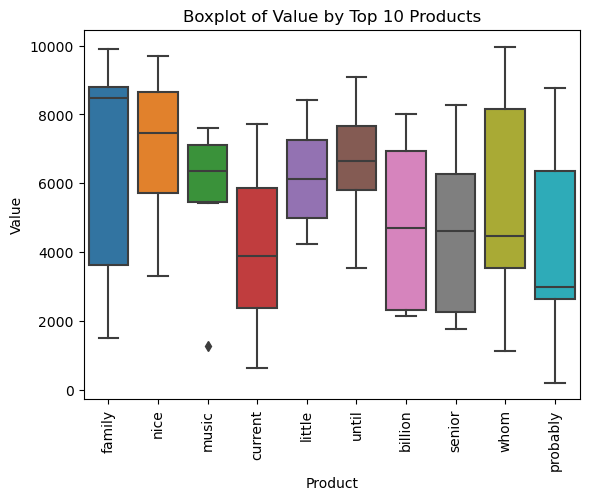

In [27]:
# Getting the top 10 categories by frequency or total value
top_10_categories = Sample_data['Product'].value_counts().nlargest(10).index

# Filtering the DataFrame to only include the top 10 categories
top_10_sample = Sample_data[Sample_data['Product'].isin(top_10_categories)]

# Boxplot for value based on top 10 product categories
sns.boxplot(x='Product', y='Value', data=top_10_sample)
plt.title('Boxplot of Value by Top 10 Products')
plt.xticks(rotation=90)
plt.show()

**Scatter Plot of Quantity vs Value**

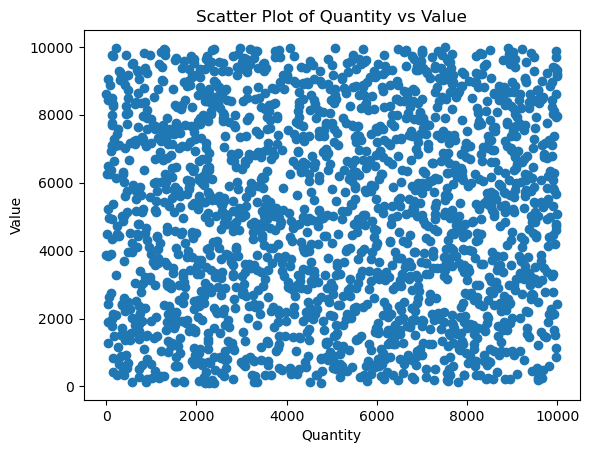

In [28]:
# Scatter plot of Quantity vs Value
plt.scatter(Sample_data['Quantity'], Sample_data['Value'])
plt.title('Scatter Plot of Quantity vs Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

**Pie Chart for payment terms**

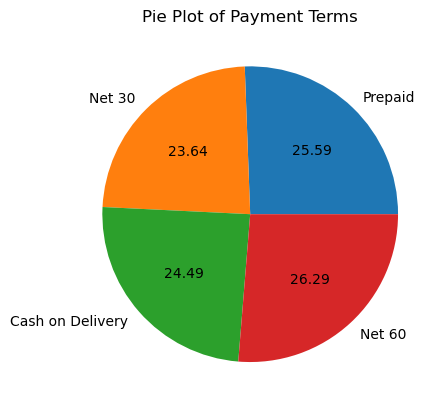

In [29]:
prepaid = 0 
net30 = 0
cod = 0
net60 = 0


for i in range(len(Sample_data['Payment_Terms'])):
    payment_term = Sample_data['Payment_Terms'].iloc[i] 
    
    if payment_term == 'Prepaid':
        prepaid += 1  # Increment the count for prepaid
        
    elif payment_term == 'Net 30':
        net30 += 1  # Increment the count for Net 30
        
    elif payment_term == 'Cash on Delivery':
        cod += 1  # Increment the count for Cash on Delivery
        
    elif payment_term == 'Net 60':
        net60 += 1  # Increment the count for Net 60

Payment_Terms = [prepaid, net30, cod, net60]
labels = ['Prepaid', 'Net 30', 'Cash on Delivery', 'Net 60']

plt.pie(Payment_Terms, labels=labels, autopct='%.2f')
plt.title('Pie Plot of Payment Terms')

plt.show()


Through pie chart we can say that all 4 payment terms are more or less are equally preferred during the transactions 
The highest one is Net 60 with 26.29% of the total weightage.

**Histogram of Value**

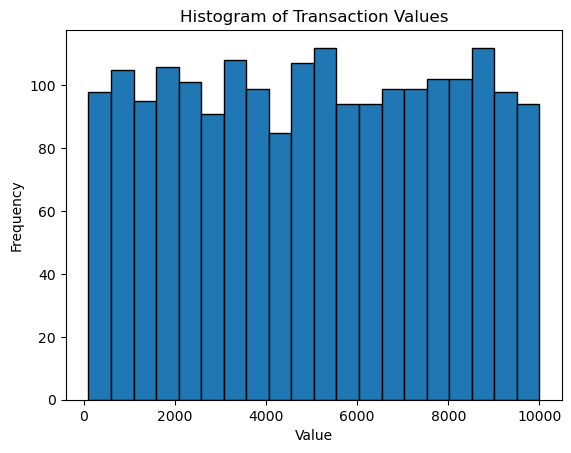

In [30]:
# Histogram of the 'Value' column
plt.hist(Sample_data['Value'], bins=20, edgecolor='k')
plt.title('Histogram of Transaction Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# NON-CATEGORICAL DATA

# COMPOSITE MEASURE

In [33]:
import statistics as stats

# coefficient of quantity
Coeff_Var_Quantity = stats.stdev(non_categorical_df['Quantity'])/stats.mean(non_categorical_df['Quantity'])
print('Coefficient of variation for Quantity : ', round(Coeff_Var_Quantity,2))

Coeff_Var_Value = stats.stdev(non_categorical_df['Value'])/stats.mean(non_categorical_df['Value'])
print('Coefficient of variation for Value : ', round(Coeff_Var_Value,2))

# coefficient of weight
Coeff_Var_Weight = stats.stdev(non_categorical_df['Weight'])/stats.mean(non_categorical_df['Weight'])
print('Coefficient of variation for Weight : ', round(Coeff_Var_Weight,2)) 

Coefficient of variation for Quantity :  0.58
Coefficient of variation for Value :  0.57
Coefficient of variation for Weight :  0.58


Coefficient of variation tells us about how much the variability is present within the datadet,
So here:

# QUANTITY:
Quantities have variation of 0.58
This implies that  ->
1. Quantities are spread out around the mean by approx 58% of the mean value.
2. They are not to much clustered around the mean but have different quantities' ranges.

# VALUE: 
Values have variation of 0.57
This implies that ->
1. Values are spread around the mean by approx 57% of the mean value.
2. Different values for different transactions is present.

# WEIGHT:
Weights have variation of 0.58 among them
This implies that ->
1. Weights are spread around the mean by approx 58% of the mean value.
2. Inconsistency in weights are here (which means different weights for different quantities are present)
                                      

In [34]:
# correlation between quantity and weight
non_categorical_df['Quantity'].corr(non_categorical_df['Weight'])

0.004873992732354515

# Correlation between Quantities and Weights

The correlation between the quantites and the weights is 0.004873992732354515 which indicates a weak correlation between the 2, and these can be 2 possible reasons for that:

1. In a manufacturing setting, if you measure the weight of products and their quantities, a weak correlation might indicate that weight doesn’t scale linearly with quantity, possibly due to varying product types or sizes.

2. For consumer goods where packaging varies, the quantity and weight might not have a strong linear relationship due to differences in packaging materials and sizes.

In [35]:
# correlation between quantity and Value
non_categorical_df['Quantity'].corr(non_categorical_df['Value'])

0.01158720648000989

# Correlation between Quantity and Value 
The correlation is very weak which tells the quantity is weakly correlated with the transcation value.
This can happen due to the change in market trends, discounts given, customer demographics etc. reasons.

In [36]:
import numpy as np
import scipy.stats as stats

In [37]:
# calculation confidence interval for quantity

mean = np.mean(non_categorical_df['Quantity'])
std_error = stats.sem(non_categorical_df['Quantity'])

confidence = 0.95 # 95% comfidence level
margin_of_error = std_error * stats.t.ppf((1 + confidence) / 2., len(non_categorical_df['Quantity']) - 1)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

confidence_interval

(4917.676021789145, 5172.571854272824)

# Confidnce Interval of Quantity
This will tells us that the actual average quantity of transactions (including import and export, for the whole dataset) will lie in between (4917.676021789145, 5172.571854272824).


In [38]:
# calculation confidence interval for Weights

mean = np.mean(non_categorical_df['Weight'])
std_error = stats.sem(non_categorical_df['Weight'])

confidence = 0.95 # 95% comfidence level
margin_of_error = std_error * stats.t.ppf((1 + confidence) / 2., len(non_categorical_df['Weight']) - 1)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

confidence_interval

(2443.2098943448914, 2571.4549132513107)

# Confidence Interval of Weight
This will tells us that the actual average weight of transactions (including import and export, for the whole dataset) will lie in between (2443.2098943448914, 2571.4549132513107).

--------- 
end of composite measure 

---------

# INFERENTIAL STATISTICS

# TEST OF MEAN

# T - test
 As the columns belongs to same dataset and are information about same entity we will
 perform paired T - test. 

In [41]:
# Test on Quantity and Weight
t_stats1 = stats.ttest_rel(non_categorical_df['Quantity'], non_categorical_df['Weight'])
print('T-Statistic, p_value and df: ', t_stats1)

significance_level = 0.05

if t_stats1.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df:  TtestResult(statistic=34.95316136620278, pvalue=2.5310817544158505e-209, df=2000)
Signifiance difference between the means


In [42]:
# Test on Quantity and Value
t_stats2 = stats.ttest_rel(non_categorical_df['Quantity'], non_categorical_df['Value'])
print('T-Statistic, p_value and df: ', t_stats2)
print()

significance_level = 0.05

if t_stats2.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df:  TtestResult(statistic=-0.12446330295275622, pvalue=0.9009609620719365, df=2000)

No Signifiance difference between the means


In [43]:
# Test on Weight and Value
t_stats3 = stats.ttest_rel(non_categorical_df['Weight'], non_categorical_df['Value'])
print('T-Statistic, p_value and df: ', t_stats3)
print()

significance_level = 0.05

if t_stats3.pvalue < significance_level:
    print('Signifiance difference between the means')
else:
    print('No Signifiance difference between the means')

T-Statistic, p_value and df:  TtestResult(statistic=-35.603324953526645, pvalue=1.8121468081163174e-215, df=2000)

Signifiance difference between the means


 end of test of Mean

# Test of variance:

1. F - TEST - using test on quantity and weight

In [44]:
var_Quantity = np.var(non_categorical_df['Quantity'], ddof = 1)
var_Weight = np.var(non_categorical_df['Weight'], ddof = 1)

print('Variance of Quantity : ', var_Quantity)
print('Variance of Weight : ', var_Weight)

F = var_Quantity / var_Weight

dof1 = len(non_categorical_df['Quantity']) - 1
dof2 = len(non_categorical_df['Weight']) - 1

p_value = 1 - stats.f.cdf(F, dof1, dof2) # cdf = cumulative distribution function

p_value_2T = np.round(p_value * 2, 18)
print("p_value for 2 tail: ", p_value_2T)

significance_level = 0.05
print()
if (p_value_2T < significance_level):
    print("The variances are significantly different")

else:
    print("The variances are not significantly different")

Variance of Quantity :  8450658.983631702
Variance of Weight :  2139174.035919069
p_value for 2 tail:  2.22e-16

The variances are significantly different


The cause of significantly different could be less variance of weight as comapre to quantity which also implies that weight is small spread around the mean as comapre to quantity.


2. LEVENE TEST - using test on quantity and value

For this test lets assume that both entities have equal variance

In [45]:
stat, p_value = stats.levene(non_categorical_df['Quantity'],non_categorical_df['Value'], center = 'median')
print("levene's test stats: ", stat)
print("p_value: ", p_value)
print()
significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')

else:
    print('No significant difference between the variances')


levene's test stats:  1.8461470821529067
p_value:  0.17430878939501415

No significant difference between the variances


3. BARTLETT TEST - using on weight and value

In [46]:
stat, p_value = stats.bartlett(non_categorical_df['Weight'], non_categorical_df['Value'])
print("Bartlett's Test Stats: ", stat)
print("P_Value: ", p_value)
print()
significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')
else:
    print('No significant difference between the variances')

Bartlett's Test Stats:  841.1577217507104
P_Value:  6.080063010195281e-185

Significant difference between the variances


# PERFORMING LEVENE AND BARTLETT TEST ON ALL QUANTITY, VALUE AND WEIGHT

In [47]:
stat, p_value = stats.levene(non_categorical_df['Quantity'],non_categorical_df['Value'],non_categorical_df['Weight'], center = 'median')
print("levene's test stats: ", stat)
print("p_value: ", p_value)
print()
significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')

else:
    print('No significant difference between the variances')

levene's test stats:  663.0751253875536
p_value:  6.703278685512691e-261

Significant difference between the variances


In [48]:
stat, p_value = stats.bartlett(non_categorical_df['Weight'], non_categorical_df['Value'], non_categorical_df['Weight'])
print("Bartlett's Test Stats: ", stat)
print("P_Value: ", p_value)
print()
significance_level = 0.05

if p_value < significance_level:
    print('Significant difference between the variances')
else:
    print('No significant difference between the variances')

Bartlett's Test Stats:  1300.907443319978
P_Value:  3.247416175842971e-283

Significant difference between the variances


 end of test of Variance

# Test of PROPORTION

# Z - TEST

1. QUANTITY - checking proportion of quantity between 0 to 2000

In [49]:
Pro_Quantity = 0 # Sample proportion
for i in range(len(non_categorical_df['Quantity'])):
    n = non_categorical_df['Quantity'].iloc[i]
    if (0 <= n <= 2000):
        Pro_Quantity += 1
    
Size_Quantity = len(non_categorical_df['Quantity'])

print('Sample proporation: ', Pro_Quantity)
print('Sample size: ', Size_Quantity)

hypothesize_proportion = 500  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Quantity) ** 0.5

z_stats = (Pro_Quantity - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)
print()
significance_level = 0.05

if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')
    

Sample proporation:  389
Sample size:  2001
hypothesized proportion 500
Z-stats:  (-6.086843058719243e-16+9.940569089727976j)
p_value:  0.0

hypothesized proportion is significantly different from the proportion quantity


2. WEIGHT - checking proportion of weights between 4000 to 4300

In [50]:
Pro_Weight = 0 # Sample proportion
for i in range(len(non_categorical_df['Weight'])):
    n = non_categorical_df['Weight'].iloc[i]
    if (4000 <= n <= 4300):
        Pro_Weight += 1
    
Size_Weight = len(non_categorical_df['Weight'])

print('Sample proporation: ', Pro_Weight)
print('Sample size: ', Size_Weight)

hypothesize_proportion = 100  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Weight) ** 0.5

z_stats = (Pro_Weight - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)

significance_level = 0.05
print()
if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')
    

Sample proporation:  139
Sample size:  2001
hypothesized proportion 100
Z-stats:  (1.0736220195112874e-15-17.53357817549982j)
p_value:  0.0

hypothesized proportion is significantly different from the proportion quantity


3. VALUE - checking proportion of weights between 2600 to 3000

In [51]:
Pro_Value = 0 # Sample proportion
for i in range(len(non_categorical_df['Value'])):
    n = non_categorical_df['Value'].iloc[i]
    if (2600 <= n <= 3000):
        Pro_Value += 1
    
Size_Value = len(non_categorical_df['Value'])

print('Sample proporation: ', Pro_Value)
print('Sample size: ', Size_Value)

hypothesize_proportion = 50  # Hypothesized quantity proportion

print('hypothesized proportion', hypothesize_proportion)

standard_error = (hypothesize_proportion * (1 - hypothesize_proportion) / Size_Value) ** 0.5

z_stats = (Pro_Weight - hypothesize_proportion) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))

print('Z-stats: ', z_stats)
print('p_value: ', p_value)

significance_level = 0.05
print()
if p_value < significance_level:
    print('hypothesized proportion is significantly different from the proportion quantity')
else:
    print('hypothesized proportion is not significantly different from the proportion quantity')
    

Sample proporation:  79
Sample size:  2001
hypothesized proportion 50
Z-stats:  (4.925058175784821e-15-80.43230389715366j)
p_value:  0.0

hypothesized proportion is significantly different from the proportion quantity


In the above 3 z-test for Quantities, Weights and Values we have assumed some hypothesized proportion and checked if the actual sample proportion matches to it or not.
this help to check assuptions about the same.
    

# chi - sq test

In [52]:
data = np.array([[non_categorical_df['Quantity']],
                [non_categorical_df['Weight']],
                [non_categorical_df['Value']]])
chi_stats, p_Value,_,_ = stats.chi2_contingency(data, correction = False)

print('chi_stats: ', chi_stats)
print('p_value: ', p_value)

significance_level = 0.05
print()
if p_value < significance_level:
    print("Significant difference in proportions between the samples")

else:
    print("No significant difference in proportions between the samples")

chi_stats:  5796868.504826169
p_value:  0.0

Significant difference in proportions between the samples


end of test of proportion 

# TEST OF NORMALITY

# 1. Shapiro-Wilk Test

In [53]:
def shapiro_test(sample, name):
    stat, p_value = stats.shapiro(sample)
    print("Shapiro-wilk Test for: ", name)
    print("Test stats: ", stat, " and p-value: ", p_value)

    significance_level = 0.05
    if p_value > significance_level:
        print("Fail to reject (sample is consistent with normality)")
    else:
        print("Reject (sample does not appear to be normally distributed)")


shapiro_test(non_categorical_df['Quantity'], "Quantity")
print("\n")
shapiro_test(non_categorical_df['Weight'], "Weight")
print("\n")
shapiro_test(non_categorical_df['Value'], "Value")


Shapiro-wilk Test for:  Quantity
Test stats:  0.9516905546188354  and p-value:  3.558227617442778e-25
Reject (sample does not appear to be normally distributed)


Shapiro-wilk Test for:  Weight
Test stats:  0.9511386156082153  and p-value:  2.633961449549941e-25
Reject (sample does not appear to be normally distributed)


Shapiro-wilk Test for:  Value
Test stats:  0.9538396596908569  and p-value:  1.1773673082561474e-24
Reject (sample does not appear to be normally distributed)


From the upper results we can say that there is asymmetry in all the 3 samples.
Maybe the samples follows any other distribution like exponential, log-normal or any other distribution.
We should perform other tests of normality to get confirm results.


<span style="color: red; font-weight: bold; font-size: 30px">2. Kolmogorov-Smirnov Test</span>

Now as the above test gives us the result that they do not belong to normal distribution, let's first check weather they are from same distribution or not.

In [54]:
import numpy as np
from scipy import stats

In [55]:
# performing K-S test
statQ_W, p_valueQ_W = stats.ks_2samp(non_categorical_df['Quantity'], non_categorical_df['Weight'])
statW_V, p_valueW_V = stats.ks_2samp(non_categorical_df['Weight'], non_categorical_df['Value'])
statV_Q, p_valueV_Q = stats.ks_2samp(non_categorical_df['Value'], non_categorical_df['Quantity'])

print('Quantity and Weight test stats: ', statQ_W, 'p-value: ', p_valueQ_W)
print('Weight and Value test stats: ', statW_V, 'p-value: ', p_valueW_V)
print('Value and Quantity test stats: ', statV_Q, 'p-value: ', p_valueV_Q)

significance_level = 0.05
print('\n')

if p_valueQ_W > significance_level:
    print("Quantity and Weight are from same distribution (fail to reject)")
else:
    print("Quantity and Weight are from different distribution (rejected)")

print('\n')

if p_valueW_V > significance_level:
    print("Weight and Value are from same distribution (fail to reject)")
else:
    print("Weight and Value are from different distribution (rejected)")

print('\n')

if p_valueV_Q > significance_level:
    print("Value and Quantity are from same distribution (fail to reject)")
else:
    print("Value and Quantity are from different distribution (rejected)")


Quantity and Weight test stats:  0.5097451274362819 p-value:  3.9315694420023144e-237
Weight and Value test stats:  0.5122438780609695 p-value:  1.398197262716011e-239
Value and Quantity test stats:  0.021989005497251374 p-value:  0.7188025893512604


Quantity and Weight are from different distribution (rejected)


Weight and Value are from different distribution (rejected)


Value and Quantity are from same distribution (fail to reject)


They all neither normally distributed nor belongs to same distribution

C:\Users\Aayush Garg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


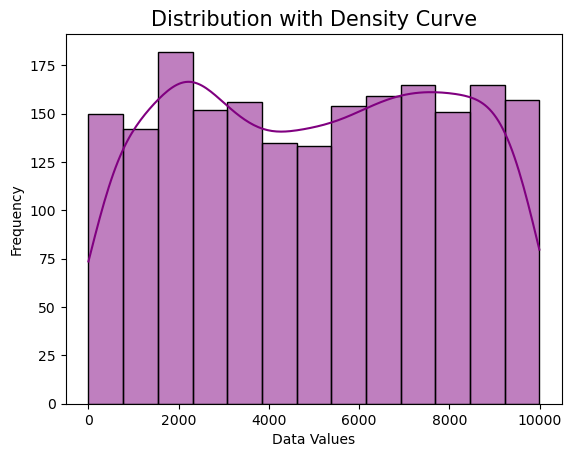

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.histplot(non_categorical_df['Quantity'], kde = True, color = 'purple')
plt.title('Distribution with Density Curve', fontsize=15)
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

C:\Users\Aayush Garg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


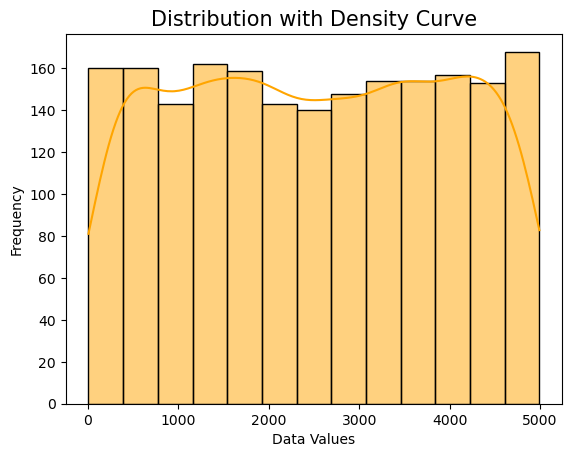

In [57]:
sns.histplot(non_categorical_df['Weight'], kde = True, color = 'orange')
plt.title('Distribution with Density Curve', fontsize=15)
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

C:\Users\Aayush Garg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


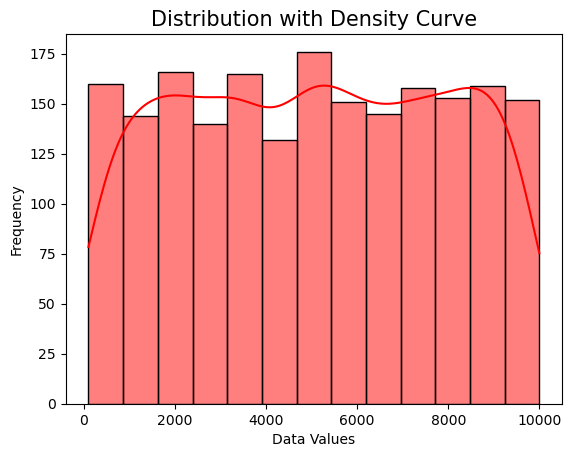

In [58]:
sns.histplot(non_categorical_df['Value'], kde = True, color = 'red')
plt.title('Distribution with Density Curve', fontsize=15)
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Regression

**Second-Degree Polynomial Regression**

In [59]:
#Second-Degree Polynomial Regression (Imports)Predict Weight based on Value for Import transactions               
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Filter for Import transactions
df_imports = Sample_data[Sample_data['Import_Export'] == 'Import']  # Adjust condition based on your column

# Define dependent and independent variables
X = df_imports[['Quantity']]  # Replace with actual column name
y = df_imports['Weight']  # Replace with actual column name

# Transform the input for a polynomial regression (second degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
#Second-Degree Polynomial Regression (Imports)Predict Weight based on Value for Import transactions.
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Output the model coefficients
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00 -3.60900776e-02  4.50355057e-06]
2520.2108082788245


**Interpretation:**

**Intercept:**

The intercept of 2520.21 represents the estimated Weight when Quantity is zero. This is the baseline Weight when the effect of Quantity is not considered. Coefficients:

Based on the coefficients, the model suggests a very weak linear relationship between the quantity and weight, with a slight upward curvature. The constant term indicates a baseline value of around 2520.21. However, the overall effect of the independent variable on the dependent variable seems to be minimal.

# Logisitic Regression

In [60]:
#Logistic Regression-Predict whether a transaction is Import or Export based on Value and Weight.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define dependent and independent variables
X = Sample_data[['Value', 'Weight']]  # Use 'sample' as the DataFrame variable name
y = Sample_data['Import_Export']  # Ensure 'Import_Export' contains binary values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Export       0.47      0.42      0.45       205
      Import       0.46      0.51      0.48       196

    accuracy                           0.46       401
   macro avg       0.46      0.46      0.46       401
weighted avg       0.46      0.46      0.46       401



# Cross-sectional Polynomial Regression

In [61]:
#Cross-sectional Polynomial Regression (Top 5 Countries) - Model the relationship between Value and Quantity for transactions from the top 5 countries.
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the top 5 countries based on transaction count
top_countries = Sample_data['Country'].value_counts().head(5).index
df_top = Sample_data[Sample_data['Country'].isin(top_countries)]

# Define dependent and independent variables
X = df_top[['Quantity']]  # Replace with actual column name
y = df_top['Value']  # Replace with actual column name

# Transform the input for a polynomial regression (second degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Output the model coefficients
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00  2.45681010e-01 -2.33453494e-05]
4658.38694478883


**Interpreting the Coefficients:**

- a (constant): This represents the predicted value of y (Value) when x (Quantity) is 0. In your model, for the top 5 countries, even with no quantity, the predicted value of the transaction is around 6176.69. However, this might not be a realistic interpretation for all transactions.

- b (linear coefficient): This represents the linear relationship between Value and Quantity. A negative coefficient suggests that as Quantity increases, Value tends to decrease slightly for the top 5 countries. The magnitude is relatively small, indicating a weak effect.
  
- c (quadratic coefficient): This represents the quadratic relationship between Value and Quantity. A negative coefficient suggests a slight downward curvature in the relationship for the top 5 countries. However, the value is very small, indicating a very weak curvature.
Overall Interpretation:

Based on the coefficients, the model suggests that for the top 5 countries, there might be a weak negative linear relationship between "Value" and "Quantity," with a very slight downward curvature. It's important to consider that this model only applies to transactions from these specific countries.



### Observations | Findings

* Data Overview: Key variables include categorical data (like country, product, import/export, shipping method), and numerical data (like quantity, value, and weight).

* Import/Export Trends: Significant variation was observed across countries in terms of both volume and value of imports and exports. Some countries focus more on exports while others have higher import activities, potentially highlighting trade imbalances or specialization in certain industries.

* Dominant Product Categories: Certain product categories showed a high volume and value of transactions. These categories potentially drive the bulk of trade in the dataset.

* Shipping Methods: The most frequently used shipping methods were identified. High-value transactions often used faster and more secure shipping options, while lower-value transactions relied on slower, cost-effective methods.

# Managerial Insights
**Performance Benchmarking**
* Set Clear Goals: Use statistical analysis to establish benchmarks for key metrics like sales, customer satisfaction, and operational efficiency.
* Monitor Performance: Regularly compare actual results against these benchmarks to identify areas that need improvement.
  
**Continuous Monitoring and Adaptation**
* Stay Updated: Regularly review data and analysis to adapt to changing market conditions.
* Make Informed Decisions: Use up-to-date information to make agile and informed decisions.
  
**Data-Driven Decision Making**
* Forecast Demand: Use correlation analysis to predict demand accurately.
* Optimize Operations: Plan production, manage resources, and optimize supply chain based on demand forecasts.
* Refine Strategies: Use data to set competitive prices and design effective promotions.
  
**Shipping Method Efficiency**
* Tailor Shipping: Choose shipping methods that best suit each product category.
* Negotiate Contracts: Explore cost-saving options by renegotiating contracts with shipping providers.
* Balance Cost and Speed: Prioritize speed for high-value items and cost for low-value items.
  
**Product and Category Focus**
* Optimize High-Performers: Focus on categories with high trade volume and value.
* Target Underperformers: Develop strategies to improve the performance of low-performing categories.

# Recommendations
* Embrace Technology: Use predictive analytics and automation tools for data-driven decision-making.
* Prioritize Sustainability: Adopt eco-friendly practices and reduce environmental impact.
* Monitor Performance: Set KPIs and gather feedback to continuously improve.
  
**In Summary:**
By leveraging data-driven insights, optimizing operations, and focusing on key areas, businesses can enhance performance, reduce costs, and achieve sustainable growth.